## darknet @Google Colaboratory

In [1]:
%%bash
git clone https://github.com/pjreddie/darknet
cd darknet
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Cloning into 'darknet'...


In [3]:
cd darknet

/content/darknet


In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2018-06-05 13:35:10--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  21.4MB/s    in 12s     

2018-06-05 13:35:24 (19.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

conv   1024  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x1024  1.595 BFLOPs
   77 conv    512  1 x 1 / 1    13 x  13 x1024   ->    13 x  13 x 512  0.177 BFLOPs
   78 conv   1024  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x1024  1.595 BFLOPs
   79 conv    512  1 x 1 / 1    13 x  13 x1024   ->    13 x  13 x 512  0.177 BFLOPs
   80 conv   1024  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x1024  1.595 BFLOPs
   81 conv    255  1 x 1 / 1    13 x  13 x1024   ->    13 x  13 x 255  0.088 BFLOPs
   82 yolo
   83 route  79
   84 conv    256  1 x 1 / 1    13 x  13 x 512   ->    13 x  13 x 256  0.044 BFLOPs
   85 upsample            2x    13 x  13 x 256   ->    26 x  26 x 256
   86 route  85 61
   87 conv    256  1 x 1 / 1    26 x  26 x 768   ->    26 x  26 x 256  0.266 BFLOPs
   88 conv    512  3 x 3 / 1    26 x  26 x 256   ->    26 x  26 x 512  1.595 BFLOPs
   89 conv    256  1 x 1 / 1    26 x  26 x 512   ->    26 x  26 x 256  0.177 BFLOPs
   90 conv    512  3 x 3 / 1    26 x  26 x 256   -

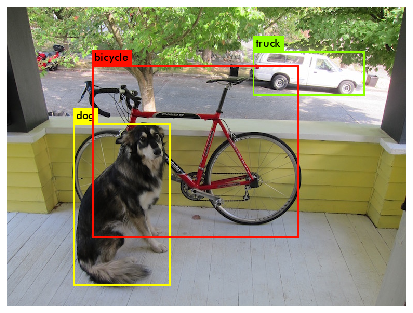

In [8]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.png'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)